In [17]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# add one more layer and return the output of this layer
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases  = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

In [4]:
# Make up some real data
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]     # shap(300,1)
noise  = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

In [5]:
y_data

array([[ 0.56983286],
       [ 0.4922605 ],
       [ 0.40497692],
       [ 0.41507925],
       [ 0.52681751],
       [ 0.48006895],
       [ 0.39587015],
       [ 0.44610734],
       [ 0.43660052],
       [ 0.46755636],
       [ 0.38256999],
       [ 0.40286102],
       [ 0.42672383],
       [ 0.24396625],
       [ 0.17038272],
       [ 0.27243168],
       [ 0.2849375 ],
       [ 0.24224151],
       [ 0.30804262],
       [ 0.21702258],
       [ 0.22535842],
       [ 0.27351694],
       [ 0.25161695],
       [ 0.26526644],
       [ 0.15605428],
       [ 0.26283884],
       [ 0.19396288],
       [ 0.14208835],
       [ 0.27837867],
       [ 0.06941007],
       [ 0.18055873],
       [ 0.22332854],
       [ 0.10337433],
       [ 0.06319995],
       [ 0.0860373 ],
       [ 0.10202885],
       [-0.01431077],
       [ 0.04099137],
       [ 0.05437804],
       [-0.05029742],
       [ 0.01359559],
       [ 0.07560285],
       [-0.0214712 ],
       [ 0.02277367],
       [-0.05611872],
       [-0

In [6]:
# define placeholder for inputs to network
# 定义输入的placeholder变量
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

In [7]:
# add hidden layer
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)

In [8]:
# add output layer
prediction = add_layer(l1, 10, 1, activation_function=None)

In [9]:
# the error between prediction and real data
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),reduction_indices=[1]))

In [10]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [11]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

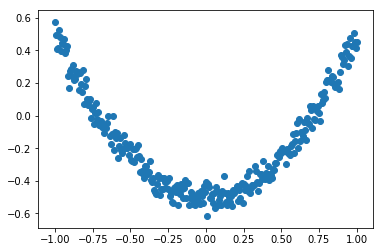

In [23]:
# plot the real data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()
for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to visualize the result and improvement
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        # plot the prediction
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(0.1)